In [2]:
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)
from keras.backend.tensorflow_backend import set_session
set_session(tf.Session(config=config))
import keras
from keras import backend as K
K.set_image_dim_ordering('tf')
from keras.models import Model
import numpy as np
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
from matplotlib.pyplot import imshow
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Activation, Conv2D, MaxPooling2D,BatchNormalization,GlobalAveragePooling2D
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
import keras
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [13]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,)
valid_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/home/saiaravinds/dog_train',
        target_size=(224, 224),
        batch_size=120,class_mode='categorical' )
valid_generator = train_datagen.flow_from_directory(
        '/home/saiaravinds/dog_val',
        target_size=(224, 224),
        batch_size=120,class_mode='categorical' )

model = Sequential()
model.add(BatchNormalization(input_shape=(224, 224, 3)))
model.add(Conv2D(filters=16, kernel_size=3, kernel_initializer='he_normal', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=3, kernel_initializer='he_normal', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=3, kernel_initializer='he_normal', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=3, kernel_initializer='he_normal', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=3, kernel_initializer='he_normal', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(GlobalAveragePooling2D())

model.add(Dense(120, activation='softmax'))
#sgd=
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
metrics=['accuracy'])

model.summary()
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=100,validation_data=valid_generator,validation_steps=10,use_multiprocessing=True)

Found 9022 images belonging to 120 classes.
Found 1200 images belonging to 120 classes.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_25 (Batc (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 111, 111, 16)      0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 111, 111, 16)      64        
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 54, 54, 32)        0         
______________________________________________________

KeyboardInterrupt: 

In [4]:
model.fit_generator( train_generator,
        steps_per_epoch=10,
        epochs=40,use_multiprocessing=True)

Epoch 1/40
10/10 [==============================] - 24s - loss: 5.4165 - acc: 0.2183    
Epoch 2/40
10/10 [==============================] - 21s - loss: 3.2239 - acc: 0.3642    
Epoch 3/40
10/10 [==============================] - 20s - loss: 1.9257 - acc: 0.5492    
Epoch 4/40
10/10 [==============================] - 20s - loss: 1.1683 - acc: 0.7033    
Epoch 5/40
10/10 [==============================] - 21s - loss: 0.7473 - acc: 0.8075    
Epoch 6/40
10/10 [==============================] - 21s - loss: 0.5352 - acc: 0.8658    
Epoch 7/40
10/10 [==============================] - 22s - loss: 0.3384 - acc: 0.9117    
Epoch 8/40
 2/10 [=====>........................] - ETA: 16s - loss: 0.2213 - acc: 0.9458

Process Process-102:
Traceback (most recent call last):
  File "/work/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/work/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/work/anaconda3/lib/python3.6/site-packages/keras/utils/data_utils.py", line 568, in data_generator_task
    generator_output = next(self._generator)
  File "/work/anaconda3/lib/python3.6/site-packages/keras/preprocessing/image.py", line 737, in __next__
    return self.next(*args, **kwargs)
  File "/work/anaconda3/lib/python3.6/site-packages/keras/preprocessing/image.py", line 1035, in next
    x = self.image_data_generator.random_transform(x)
  File "/work/anaconda3/lib/python3.6/site-packages/keras/preprocessing/image.py", line 604, in random_transform
    fill_mode=self.fill_mode, cval=self.cval)
  File "/work/anaconda3/lib/python3.6/site-packages/keras/preprocessing/image.py", line 207, 

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
imgg=image.load_img("/home/saiaravinds/pug2.jpg",target_size=(224,224))
imshow(imgg)
plt.show()
x=image.img_to_array(imgg)
x = np.expand_dims(x, axis=0)
x=x/255
#x=preprocess_input(x)

In [6]:
y=model.predict_proba(x)
print(y.shape)
l=np.argmax(y,1)
print(l)
print(y[0,l])
print(list(train_generator.class_indices.keys())[list(train_generator.class_indices.values()).index(l)])

1/1 [==============================] - 0s
(1, 120)
[51]
[ 0.9799509]
great_dane


In [22]:
print(train_generator.class_indices)


{'affenpinscher': 0, 'afghan_hound': 1, 'african_hunting_dog': 2, 'airedale': 3, 'american_staffordshire_terrier': 4, 'appenzeller': 5, 'australian_terrier': 6, 'basenji': 7, 'basset': 8, 'beagle': 9, 'bedlington_terrier': 10, 'bernese_mountain_dog': 11, 'black-and-tan_coonhound': 12, 'blenheim_spaniel': 13, 'bloodhound': 14, 'bluetick': 15, 'border_collie': 16, 'border_terrier': 17, 'borzoi': 18, 'boston_bull': 19, 'bouvier_des_flandres': 20, 'boxer': 21, 'brabancon_griffon': 22, 'briard': 23, 'brittany_spaniel': 24, 'bull_mastiff': 25, 'cairn': 26, 'cardigan': 27, 'chesapeake_bay_retriever': 28, 'chihuahua': 29, 'chow': 30, 'clumber': 31, 'cocker_spaniel': 32, 'collie': 33, 'curly-coated_retriever': 34, 'dandie_dinmont': 35, 'dhole': 36, 'dingo': 37, 'doberman': 38, 'english_foxhound': 39, 'english_setter': 40, 'english_springer': 41, 'entlebucher': 42, 'eskimo_dog': 43, 'flat-coated_retriever': 44, 'french_bulldog': 45, 'german_shepherd': 46, 'german_short-haired_pointer': 47, 'gian

In [7]:
import pandas as pd
df=pd.read_csv("/home/saiaravinds/sample_submission.csv")
def test():
    t=[] 
    for i in range(df.shape[0]):
        #print(df.iloc[i][0])
        imgg=image.load_img("/home/saiaravinds/test/"+df.loc[i][0]+".jpg",target_size=(224,224))
        x=image.img_to_array(imgg)
        x=x/255
        t.append(x)
    return t
b=test()    


In [88]:
#print(b)
b=np.asarray(b)
print(b.shape)

(10357, 224, 224, 3)


In [89]:
print(b[0].shape)

(224, 224, 3)


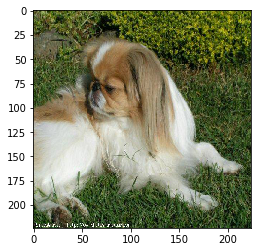

In [90]:
imshow(b[0])
plt.show()

In [93]:
y1=model.predict_proba(b)
np.savetxt('doggy.csv',y1,fmt='%f',delimiter=',')

10336/10357 [============================>.] - ETA: 0s

In [116]:
from PIL import Image
img = Image.open("/home/saiaravinds/darknet/data/n02115641_10021-Copy1.jpg")
img2 = img.crop((115, 227, 300, 400))
img2.save("/home/saiaravinds/img2.jpg")
#Bounding Box: Left=115, Top=227, Right=273, Bottom=374


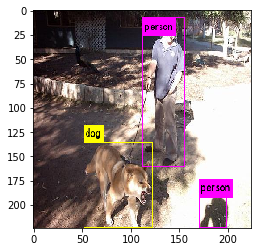

In [119]:
#Bounding Box: Left=140, Top=83, Right=447, Bottom=348
imgg=image.load_img("/home/saiaravinds/darknet/predictions.png",target_size=(224,224))
imshow(imgg)
plt.show()
x=image.img_to_array(imgg)
x = np.expand_dims(x, axis=0)
x=x/255

In [120]:
y=model.predict_proba(x)
print(y.shape)
l=np.argmax(y,1)
print(l)
print(y[0,l])
print(list(train_generator.class_indices.keys())[list(train_generator.class_indices.values()).index(l)])

1/1 [==============================] - 0s
(1, 120)
[29]
[ 0.34666401]
chihuahua


In [121]:
model.save_weights('/home/saiaravinds/Dog_breed/dogbreedScratch_keras.h5')